# Credit Card Data and Trends

By: Keaton Brausch 

## Introduction

This technical report focuses on the data cleaning, visualization, hypothesis testing and classification of my credit card transaction history for just over the past year.  

### Domain 

The domain of this project is the finance domain and more specifically the personal finance domain. This domain is important to me, just as it should be to anyone, because having knowledge within the world of personal finance gives me the ability to be successful in managing my money and other assets in my life, such as making smart purchases and investments. Within this domain I am researching the when, where and what of how I spend my money, and more specifically the when, where and what of how I spend my money using a Discover student credit card. Using this data I am hoping I can learn how I spend my money and become better at deciding what to and what to not spend money on in the future.

### Hypotheses

My general, overall hypothesis is that while researching this domain I will find that I have spent more money than I realized either due to purposeful negligence or just irresponsibility. 

Some of my other hypotheses that will be be tested include:
* The mean amount of a transaction in the 'Merchandise' category is different from the mean amount of a transaction in the 'Restaurants' category.
* The mean amount of a transaction in the 'Merchandise' category is greater than the overall mean transaction amount.
* The average transaction amount on a Friday is less than the average transaction amount on a Monday.

### Impact and Stakeholders 

The potential impact of what can be learned researching this domain is knowledge that will allow me to better assess my spending and make changes to improve it. This study can help improve the overall state of my personal finances as well as help other college aged people improve theirs based on the findings and data. Other potential impacts could include data or findings that credit card companies, such as Discover, could be interested in to learn about the credit card usage of college students. 

The stakeholders in this in this case are also similar. I, Keaton Brausch, am a stakeholder in this study, as the success of this study will theoretically improve my personal finances and therefore improving my overall life. The credit card company, Discover, who supplies my credit card is also a stakeholder as using this data and the findings from it they could improve their credit cards that are marketed towards college students. This could also apply to other companies that offer goods and services aimed at college students as they learn where, when and on what an average college student might spend their money. Other possible stakeholders could be those attempting to teach people about personal finance or perhaps other college students, or people in general, who want to study others spending habits. This study could be an example of what to and not to spend money on or an example of either good or bad (most definitely bad), financial habits.

### Classification

In this dataset I decided to try to classify the Category of each transaction. I found that using the kNN classifier with k=1 neighbor I could get the accuracy to .86 which I would consider very good considering the extreme variance and amount of outlier data points in my dataset (e.g. a one of purchase at some random store). The accuracy for kNN was just barely better than the Decision Tree classifier which came in with an accuracy of .79. I was pretty satisfied with the accuracy of both of these methods and both could have been made better if I took out the outliers before training and testing the dataset.

## Data Analysis 

### Dataset Description - Credit Card Transaction Data

The dataset I will be using for this project is my credit card transaction history over the past year (give or take a month). The data in this dataset is automatically collected by Discover, my credit card provider, everytime I complete a transaction with my Discover credit card. This data is easily accessible via their website and can be downloaded. The downloaded data comes in the .csv format and includes 5 attributes and roughly 300 instances.

The 5 attributes included in this dataset are:
* Trans. Date: The date on which the transaction occurred.
* Post Date: The date on which the transaction is officially posted onto the 
* Description: A description of the transaction (namely a description of the merchant)
* Amount: The amount of dollars (USD) the transaction cost.
* Category: The category of the transaction (e.g. Restaurant, Supermarkets etc.)



### Data Preparation 

For this project the data preparation process involved largely cleaning the dataset in addition to adding additional data to the dataset. The goal of the data preparation stage was to create an uniform and expanded dataset that is easy and effective to work with.

#### Data Cleaning

This dataset was relatively easy to clean as there were no missing values and 3 of the 4 columns are uniform and needed almost no cleaning. The primary problems that needed to be fixed via data cleaning were:

* The presence of invalid data points (negative values) 
    * To fix this the invalid instances that contained negative values were dropped from the dataset.
* A lack of uniformity across the transaction description attribute (for example AMZN vs Amazon). 
    * To fix this an if-else chain was written to create uniform descriptions for the the descriptions that appeared most often (i.e. Amazon). Any one off descriptions that only appeared once or twice were cleaned by hand after the majority of the descriptions were cleaned via the if-else chain. 
* Unnecessary data
    * The easy fix to this was simply to drop the DataFrame columns containing the unwanted data.
    
#### DataFrame before cleaning:

In [1]:
import utils
import pandas as pd 

#first step is to put the dataset into a DataFrame
cc_df = pd.read_csv('raw_cc_data.csv',index_col=0, header=0)

#print DataFrame to show before cleaning
print(cc_df)

            Post Date                                        Description  \
Trans. Date                                                                
8/28/19       8/28/19  LIM*RIDE COST 888-546-3345 CAAPPLE PAY ENDING ...   
8/28/19       8/28/19                      SAFEWAY STORE 3255 SPOKANE WA   
8/29/19       8/29/19                               NIKE INC. SPOKANE WA   
8/31/19       8/31/19                                  TARGET SPOKANE WA   
8/31/19       8/31/19          TARGET SPOKANE WAAPPLE PAY ENDING IN 0296   
...               ...                                                ...   
11/9/20       11/9/20    AMAZON.COM*289CP7UQ0 AMZN.COM/BILLWA28TVPRS751Z   
11/14/20     11/14/20  DIRECTPAY FULL BALANCESEE DETAILS OF YOUR NEXT...   
11/16/20     11/16/20  DOORDASH*MCDONALDS 6506819470 CAAPPLE PAY ENDI...   
11/17/20     11/17/20    AMAZON.COM*2053Q5TE2 AMZN.COM/BILLWA23QSLL567KF   
11/17/20     11/17/20               TRV* PATAGONIA WORN WE 3036539611 CA   

           

#### DataFrame after cleaning:

In [2]:
#dropping an unnecessary attribute
del cc_df['Post Date']

#utils. functions stored in seperate .py file
#getting rid of any negative transaction amounts
utils.remove_negatives(cc_df,'Amount')

#clean ~95% of transaction descriptions
utils.clean_descriptions(cc_df,'Description','Category')

#export DataFrame to .csv for manual cleaning 
utils.write_csv('dirty_cc_data.csv', cc_df)

#import clean dataset back into DataFrame after manual cleaning
cc_df = pd.read_csv('clean_cc_data.csv',header=0)

#print DataFrame to show after cleaning
print(cc_df)

         Date    Description  Amount               Category
0     8/28/19  Lime Scooters    1.50  Travel/ Entertainment
1     8/28/19        Safeway   11.97           Supermarkets
2     8/29/19           Nike   43.56            Merchandise
3     8/31/19         Target   34.85           Supermarkets
4     8/31/19         Target   71.72           Supermarkets
..        ...            ...     ...                    ...
264   11/8/20        Safeway   52.78           Supermarkets
265   11/9/20         Amazon   13.34            Merchandise
266  11/16/20       DoorDash   23.63            Restaurants
267  11/17/20         Amazon   10.33            Merchandise
268  11/17/20      Patagonia   74.07            Merchandise

[269 rows x 4 columns]


### Exploratory Data Analysis 

#### Data Aggregation 

The only data aggregation technique I am going to apply is expanding my data via adding the day of the week on which the transaction occurred to each instance in the original dataset.

#### Expanding the Dataset

To improve my dataset and what I could do with it I decided to add more semi-relevant data to it. In this case I chose to add the day of the week on which each transaction was completed to the dataset. Adding this data would allow me to find answers to questions such as:

* "Is more money spent on the weekends or weekdays?" 
* "Is there a specific day of the week when the most money is spent?"
* "Is there a consistent trend of spending over a weekly basis?"

In order to add days of the week for each instance in the dataset I used the 'Date' attribute in combination with the 'datetime' python module. Using the following python code I was able to add the 'Day of Week' attribute to the dataset.

#### Expanded DataFrame:

In [3]:
import datetime as dt

#date and day lists
date_ser = cc_df['Date']
day_list = []

#day of week key to decode .weekday() return
days_key = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')

#for loop loops through the date column in dataset
for i in range(0, len(date_ser)):
    #splits date into month, day and time variables
    month, day, year = (int(x) for x in date_ser[i].split('/'))
    #creates a date from the datetime module
    curr_date = dt.date(year, month, day)
    #gets the day of week as an integer and then converts to a string
    curr_day = curr_date.weekday()
    curr_day = days_key[curr_day]
    #appends the day name to a list
    day_list.append(curr_day)

#adds day of week list to the dataset
cc_df['Day of Week'] = day_list

#print DataFrame so we can see expanded dataset
print(cc_df)

         Date    Description  Amount               Category Day of Week
0     8/28/19  Lime Scooters    1.50  Travel/ Entertainment   Wednesday
1     8/28/19        Safeway   11.97           Supermarkets   Wednesday
2     8/29/19           Nike   43.56            Merchandise    Thursday
3     8/31/19         Target   34.85           Supermarkets    Saturday
4     8/31/19         Target   71.72           Supermarkets    Saturday
..        ...            ...     ...                    ...         ...
264   11/8/20        Safeway   52.78           Supermarkets      Sunday
265   11/9/20         Amazon   13.34            Merchandise      Monday
266  11/16/20       DoorDash   23.63            Restaurants      Monday
267  11/17/20         Amazon   10.33            Merchandise     Tuesday
268  11/17/20      Patagonia   74.07            Merchandise     Tuesday

[269 rows x 5 columns]


#### Data Visualizations

To display my data, attributes, and the underlying relationships within my data I chose three different graphs:
* Pie Chart
* Bar Chart
* Scatter Plot

#### Visualization 1: Pie Chart

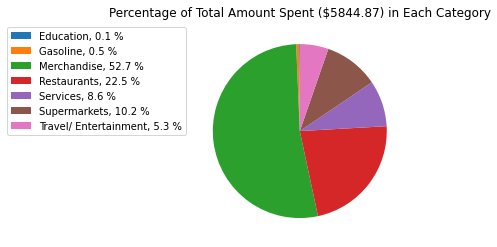

In [4]:
import matplotlib.pyplot as plt 

#create groups based on category
grouped = cc_df.groupby('Category')
sum_list = []
label_list = []
percent_list = []

#get and store the sums of amounts for each group (category)
for group_name, group_df in grouped:
    label_list.append(group_name)
    sum_list.append(round(group_df['Amount'].sum(),2))
    
#get and store the percent of total for each group (category)
for x in sum_list:
    total = sum(sum_list)
    percent_list.append((x/total)*100)
    
plt.figure() #creates a new "current" figure
plt.pie(sum_list, startangle=90) #create pie chart
plt.title('Percentage of Total Amount Spent ($5844.87) in Each Category')
plt.legend(loc='best', bbox_to_anchor=(0, 1), labels=['%s, %1.1f %%' % (l, s) for l, s in zip(label_list, percent_list)])
plt.show() #print figure

Pie chart observations: 
* The amount spent in the 'Merchandise' category made up over 50% of the total amount spent. 
* The amount spent in the 'Education' and 'Gasoline' categories combined account for less than 1% of the total amount spent. 
* The 'Travel/Entertainment', 'Supermarkets' and 'Services categories are all close together when comparing percent of the total amount spent and combined make up roughly 23% of the total amount spent.
* The 'Restaurants' category was the second biggest category making up 22.5% of the total amount spent even though it was less than half as big as the biggest category, 'Merchandise', but as big as the three next biggest categories combined; 'Travel/Entertainment', 'Supermarkets' and 'Services.

#### Visualization 2: Bar Chart

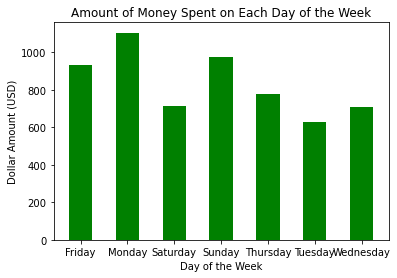

In [5]:
grouped = cc_df.groupby('Day of Week')
sum_list = []
label_list = []

#get and store the sums of amounts for each group (day of week)
for group_name, group_df in grouped:
    label_list.append(group_name)
    sum_list.append(round(group_df['Amount'].sum(),2))
    
plt.figure() #creates a new "current" figure

#creates a bar chart with gathered data
plt.bar(label_list, sum_list, color='green', width=0.5)
plt.xlabel('Day of the Week') #labels x axis
plt.ylabel('Dollar Amount (USD)') #labels y axis
plt.title('Amount of Money Spent on Each Day of the Week')
plt.show() #print figure

Bar chart observations: 
* The most amount of money was spent on Monday 
* The spending on one weekend day, Sunday, is noticeably higher then the spending on the other weekend day, Saturday.
* The amount spent spent in the beginning and ends of the week (Sunday, Monday, Friday) are much more than the amount spent in the middle of the week (Tuesday, Wednesday, Thursday).

#### Visualization 3: Scatter Plot

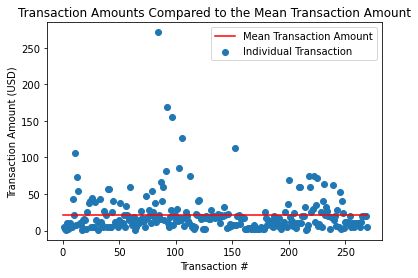

In [6]:
grouped = cc_df.groupby('Category')
mean = cc_df['Amount'].mean()
#variables
label_list = []
amount_list = []
temp_list = []
x = 0

#get and store the sums of amounts for each group (day of week)
for group_name, group_df in grouped:
    label_list.append(group_name)
    for val in group_df['Amount']:
        x = x+1
        amount_list.append(val)
        temp_list.append(x)
    
plt.figure() #creates a new "current" figure

#creates a scatter chart with gathered data
plt.scatter(temp_list, amount_list)
point1 = [0, mean]
point2 = [269, mean]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt. plot(x_values, y_values, color='red')
plt.xlabel('Transaction #') #labels x axis
plt.ylabel('Transaction Amount (USD)') #labels y axis
plt.title('Transaction Amounts Compared to the Mean Transaction Amount')
plt.legend(labels=['Mean Transaction Amount','Individual Transaction'])
plt.show() #print figure

Scatter plot observations:

* The majority of vast majority of transactions seem to be right above, right at or below the mean transaction amount.
* A relatively few number of large transactions raised the mean above the majority of transactions.
* The vast majority of transactions lie between zero and fifty dollars.

### Hypothesis Testing 

I will test three different hypotheses using the t-test:
* Is the mean amount of a transaction in the 'Merchandise' category significantly different from the mean amount of a transaction in the 'Restaurants' category?
* Is the mean amount of a transaction the 'Merchandise' category significantly greater than the mean transaction amount?
* Is the average transaction amount on a Friday less than the average Transaction amount on a Monday?

#### Hypothesis Test 1:

Is the mean amount of a transaction in the 'Merchandise' category significantly different from the mean amount of a transaction in the 'Restaurants' category?

##### 1. Prepare Data

In [7]:
import numpy as np
import scipy.stats as stats

grouped = cc_df.groupby('Category')
group1 = grouped.get_group('Merchandise')['Amount']
group2 = grouped.get_group('Restaurants')['Amount']

##### 2. State Null and Alternative Hypotheses

Since I want to prove that the mean of group 1 (Merchandise) is different than the mean of group 2 (Restaurants) my null hypothesis is: 

$H_{0}: \mu_{1} = \mu_{2}$

And since this is a two tailed t-test my alternative hypothesis is:

$H_{1}: \mu_{1} \ne \mu_{2}$

##### 3. Select the Level of Significance

$\alpha = 0.5$

##### 4. Select and calculate the appropriate test statistic

The test statistic I will use to test this hypothesis is the t-test. I will use the following equation to calculate my t-test statistic: 

$$t=\frac{\overline{X_1} - \overline{X_2}}{\sqrt{s_p^2(\frac{1}{n_1}+\frac{1}{n_2})}}$$

In this equation $\overline{X_1}$ is the sample mean for sample 1, $\overline{X_2}$ is the sample mean for sample 2, $s_p^2$ is the pooled variance ($s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$), $n_1$ is the number of observations in sample 1, and $n_2$ is the number of observations in sample 2.

The equation in python using the SciPy Stats module looks like this:

In [8]:
ttest_computed = stats.ttest_ind(group1, group2, axis=0, equal_var=True, nan_policy='omit')
print(ttest_computed)

Ttest_indResult(statistic=3.551930452553965, pvalue=0.00047950298933811456)


##### 5. Formulate the decision rule

In this case my t-test statistic is roughly 3.55. Now that I have my t-test statistic I can use it, along with my Level of Significance (0.05) and my Degrees of Freedom, 195, (which I get from the equation $n_{1} + n_{2} - 2)$ to use the t-distribution table to find my critical t-value. In this case my critical t-value is approximately $\pm$ 1.97. 

Using this value I will can formulate my decision rule to decide whether or not to reject my null hypothesis. Since $H_{1}: \mu_{1} \ne \mu_{2}$ I have a two tailed test so I create the following decision rules. 
* If the t-test statistic is greater than 1.97 or less than -1.97 then Reject $H_{0}$ and accept $H_{1}$
* If the t-test statistic is less than or equal to 2.59 and greater than or equal to -2.59 then Fail to Reject $H_{0}$

##### 6. Decision and Conclusion

Since my t-test statistic (3.55) is greater than 1.97 I Reject my null hypothesis $H_{0}$ based on my decision rule. Based on this I also Fail to Reject my alternative hypothesis $H_{1}$. Now I know from my python computation that my p-value is roughly 0.0005. Because my p-value is less than my Level of Significance I find that my result is significant at 0.05.

Therefore I can conclude at the $\alpha = 0.05$ level that the mean amount of a transaction in the 'Merchandise' category is different from the mean amount of a transaction in the 'Restaurants' category.

#### Hypothesis Test 2:

Is the mean amount of a transaction the 'Merchandise' category significantly greater than the mean transaction amount?

##### 1. Prepare Data

In [9]:
grouped = cc_df.groupby('Category')
group1 = grouped.get_group('Merchandise')['Amount']

##### 2. State Null and Alternative Hypotheses

Since I want to prove that the mean group 1 (Merchandise) is different than the mean of group 2 (mean of all transactions) my null hypothesis is: 

$H_{0}: \mu = 21.73$

And since this is a one tailed t-test my alternative hypothesis is:

$H_{1}: \mu > 21.73$

##### 3. Select the Level of Significance

$\alpha = 0.5$

##### 4. Select and calculate the appropriate test statistic

The test statistic I will use to test this hypothesis is the t-test. I will use the following equation to calculate my t-test statistic: 

$$t = \frac{\overline{x} - \mu}{\frac{s}{\sqrt{n}}}$$

In this equation $t$ is the t-test statistic, $\overline{x}$ is the sample mean, $\mu$ is the population mean being tested, $s$ is the sample standard deviation and $n$ is the sample size. 

The equation in python using the SciPy Stats module looks like this:

In [10]:
ttest_computed = stats.ttest_1samp(group1, 21.73, axis=0, nan_policy='omit')
print(ttest_computed)

Ttest_1sampResult(statistic=2.04834990433803, pvalue=0.04304462497028286)


##### 5. Formulate the decision rule

In this case my t-test statistic is roughly 2.05. Now that I have my t-test statistic I can use it, along with my Level of Significance (0.05) and my Degrees of Freedom, 104, (which I get from the equation $n - 1$) to use the t-distribution table to find my critical t-value. In this case my critical t-value is approximately 1.66. 

Using this value I will can formulate my decision rule to decide whether or not to reject my null hypothesis. Since $H_{1}: \mu > 21.73$ I have a one tailed test so I create the following decision rules. 
* If the t-test statistic is greater than 1.66 then Reject $H_{0}$ and accept $H_{1}$
* If the t-test statistic is less than 1.66 then Fail to Reject $H_{0}$

##### 6. Decision and Conclusion

Since my t-test statistic (2.05) is greater than 1.66 I Reject $H_{0}$ and accept $H_{1}$ based on my decision rule. Now I know from my python computation that my p-value is roughly 0.04. Because my p-value is less than my Level of Significance I find that my result is significant at 0.05.

Therefore I can conclude at the $\alpha = 0.05$ level that the mean amount of a transaction in the 'Merchandise' category is greater than the mean transaction amount.

#### Hypothesis Test 3:

Is the average transaction amount on a Friday less than the average Transaction amount on a Monday?

##### 1. Prepare Data

In [11]:
grouped = cc_df.groupby('Day of Week')
group1 = grouped.get_group('Monday')['Amount']
group2 = grouped.get_group('Friday')['Amount']

##### 2. State Null and Alternative Hypotheses

Since I want to prove that the mean of group 1 (Friday) is less than the mean of group 2 (Monday) my null hypothesis is: 

$H_{0}: \mu_{1} = \mu_{2}$

And since this is a one tailed t-test my alternative hypothesis is:

$H_{1}: \mu_{1} < \mu_{2}$

##### 3. Select the Level of Significance

$\alpha = 0.5$

##### 4. Select and calculate the appropriate test statistic

The test statistic I will use to test this hypothesis is the t-test. I will use the following equation to calculate my t-test statistic: 

$$t=\frac{\overline{X_1} - \overline{X_2}}{\sqrt{s_p^2(\frac{1}{n_1}+\frac{1}{n_2})}}$$

In this equation $\overline{X_1}$ is the sample mean for sample 1, $\overline{X_2}$ is the sample mean for sample 2, $s_p^2$ is the pooled variance ($s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$), $n_1$ is the number of observations in sample 1, and $n_2$ is the number of observations in sample 2.

The equation in python using the SciPy Stats module looks like this:

In [12]:
ttest_computed = stats.ttest_ind(group1, group2, axis=0, equal_var=True, nan_policy='omit')
print(ttest_computed)

Ttest_indResult(statistic=0.9954337242517922, pvalue=0.3222546794175606)


##### 5. Formulate the decision rule

In this case my t-test statistic is roughly 0.99. Now that I have my t-test statistic I can use it, along with my Level of Significance (0.05) and my Degrees of Freedom, 88, (which I get from the equation $n_{1} + n_{2} - 2)$ to use the t-distribution table to find my critical t-value. In this case my critical t-value is approximately -1.66. 

Using this value I can formulate my decision rule to decide whether or not to reject my null hypothesis. Since $H_{1}: \mu_{1} < \mu_{2}$ I have a one tailed test so I create the following decision rules. 
* If the t-test statistic is less than -1.66 then Reject $H_{0}$ and accept $H_{1}$
* If the t-test statistic is greater than or equal to -1.66 then Fail to Reject $H_{0}$

##### 6. Decision and Conclusion

Since my t-test statistic (0.99) is greater than -1.66 I Fail to Reject $H_{0}$ based on my decision rule. Now I know from my python computation that my p-value is roughly 0.32. Because my p-value is greater than my Level of Significance I find that my result is not significant at 0.05.

Therefore I cannot conclude at the $\alpha = 0.05$ level that the average transaction amount on a Friday is less than the average transaction amount on a Monday.

#### Hypothesis Testing Summary 

At $\alpha = 0.5$ two of my alternative hypotheses can be Accepted at a significant level. Therefore I can conclude:

* The mean amount of a transaction in the 'Merchandise' category is different from the mean amount of a transaction in the 'Restaurants' category.
* The mean amount of a transaction in the 'Merchandise' category is greater than the mean transaction amount.

But cannot conclude:
* The average transaction amount on a Friday is less than the average transaction amount on a Monday.

## Classification 

For classification I will be using a kNN classifier and I will be testing this classifier against the decision tree classifier. The attribute that I will be attempting to predict is the 'Category' of a transactions. The preprocessing technique that I used is the holdout method. I felt this method would be the most reliable and accurate. The classifier I compared kNN is the Decision Tree classifier. We can see from the accuracy scores the the kNN method scored better in accuracy than the decision tree method however both were fairly accurate at .86 and .79 respectively.

In [13]:
#import modules
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#copy main DataFrame into DataFrame that can be changed
class_cc_df = cc_df

#description labels to numbers
desc = preprocessing.LabelEncoder()
desc.fit(class_cc_df['Description'])
class_cc_df['Description'] = desc.transform(class_cc_df['Description'])
#category labels to numbers
cat = preprocessing.LabelEncoder()
cat.fit(class_cc_df['Category'])
class_cc_df['Category'] = cat.transform(class_cc_df['Category'])

y = class_cc_df['Category']
X = class_cc_df.drop(['Date','Day of Week','Category'], axis=1)

#create training and testing sets aka the holdout method 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.25)

#kNN classification using 1 neighbors (had highest accuracy)
clf_kNN = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
clf_kNN.fit(X_train, y_train)
#decision tree classification
clf_tree = DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_train, y_train)

#get kNN accuracy 
acc_kNN = clf_kNN.score(X_test, y_test)
print("kNN Neighbors Accuracy:", acc_kNN)
#get tree accuracy
acc_tree = clf_tree.score(X_test, y_test)
print("Decision Tree Accuracy:", acc_tree)

kNN Neighbors Accuracy: 0.8676470588235294
Decision Tree Accuracy: 0.7941176470588235


## Conclusion 

### Summary 
Overall this data exploration of my credit card transaction data gave me, and hopefully many others, a lot of insight into the domain of personal finance. Past just what the attributes provided the visualizations, hypothesis testing and  classification gave a deeper look and provided meaningful connections that were not available on surface level of the data. I was able to come to many significant conclusions such as 'Merchandise' being a category I need to significantly cut spending in.

### Classification 
The dataset was pretty easy to work with although the nature of the dataset undoubtedly lowered the accuracy of the classification methods used. This is because there were a lot of unique transactions that could not necessarily be predicted based of the rest of the data set. An easy way to improve the performance of the classifiers used would be to get rid of these unique transactions. 

### Ethical Impacts
The only potential ethical impacts I could think of regarding this data and its analysis is the potential exploitation of people through analyzing their spending habits or the spending habits of people similar to them and taking advantage of these habits in order to take their money. Besides this I do not see this data having any widespread ethical impacts.